# Проект: Исследование стартапов

## Введение

- Автор: Родина Дарья 

### Цели и задачи проекта 

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

Предстоит принять решения:
 - по каким столбцам можно объединять данные из разных таблиц;
 - можно ли доверять данным о сотрудниках стартапов и их образовании;
 - что значат покупки за 0 или за 1 доллар;
 - какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
 - как рассчитать и отобразить численные показатели и динамику.

### Описание данных 
Таблица 'acquisition' - cодержит информацию о покупках одними компаниями других компаний:
 - id — идентификатор покупки.
 - acquiring_company_id — идентификатор покупающей компании.
 - acquired_company_id — идентификатор покупаемой компании.
 - term_code — варианты расчёта.
 - price_amount — сумма сделки.
 - acquired_at — дата сделки.
 
Таблица 'company_and_rounds' - cодержит информацию о компаниях и раундах финансирования:
 - company ID — идентификатор компании.
 - name — название компании.
 - category code — категория области деятельности компании.
 - status — статус компании.
 - founded at — дата инвестирования.
 - closed at — дата закрытия компании.
 - domain — официальный сайт компании.
 - network username — ник компании в сети.
 - country code — код страны компании.
 - investment rounds — число инвестиционных раундов.
 - funding rounds — число раундов финансирования.
 - funding total — сумма финансирования.
 - milestones — вехи финансирования.
 - funding round id — идентификатор этапа финансирования.
 - company id — идентификатор компании.
 - funded at — дата финансирования.
 - funding round type — тип финансирования.
 - raised amount — сумма финансирования.
 - pre money valuation — предварительная денежная оценка.
 - participants — число участников.
 - is first round — является ли раунд первым.
 - is last round — является раунд последним.


Таблица 'education' - cодержит информацию об образовании сотрудника:
 - id — идентификатор записи об образовании.
 - person_id — идентификатор работника.
 - instituition — название учебного заведения.
 - graduated_at — дата получения образования.


Таблица 'people' - cодержит информацию о сотрудниках:
 - id — идентификатор сотрудника.
 - first_name — имя сотрудника.
 - last_name — фамилия сотрудника.
 - company_id — идентификатор компании.
 - network_username — ник в социальных сетях.


Таблица 'degrees' - cодержит информацию о типе образования сотрудника:
 - id — идентификатор записи.
 - object_id — идентификатор сотрудника.
 - degree_type — тип образования.
 - subject — специальность.
 
Таблица 'fund' - cодержит информацию о фондах:
 - id — идентификатор фонда.
 - name — название фонда.
 - category_code — категория области деятельности компании.
 - founded_at — дата создания фонда.
 - domain — сайт фонда.
 - network_username — ник фонда в сети.
 - country_code — код страны фонда.
 - investment_rounds — число инвестиционных раундов.
 - invested_companies — число профинансированных компаний.
 - milestones — вехи финансирования.
 
Таблица 'investment' - cодержит информацию о раундах инвестирования:
 - id — идентификатор этапа инвестирования.
 - funding_round_id — идентификатор раунда инвестирования.
 - company_id — индентификатор компании.
 - funding_round_type — тип финансирования.
 - fund_id — идентификатор фонда.

### Содержание проекта 
1. Знакомство с данными: загрузка и первичная обработка
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ объединенных таблиц 
4. Итоговый вывод и рекомендации 


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv


### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
!pip -q install phik  

In [2]:
# загружаем библиотеки 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import phik

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# создаем датафрейм, cодержащий информацию о покупках одними компаниями других компаний: 
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

In [5]:
# выводим информацию 
acquisition.info()
# выводим названия столбцов 
acquisition.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

В датафрейме purchase_of_companies данные предоставлены в количестве 9 407 строк и в объёме 441.1 КВ. Можно заметить пропущенные значения в столбцах term_code и acquired_at. Всего данные предоставлены в типах int - 4 столбца и object - 2 столбца. Названия столбцов отражает суть данных. 

In [6]:
# создаем датафрейм, cодержащий информацию о компаниях и раундах финансирования: 
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

In [7]:
# выводим информацию датафрейма и названия столбцов
company_and_rounds.info()
company_and_rounds.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

В датафрейме company_and_rounds данные предоставлены в количестве 217 774 строк и в объёме 36.6 МВ, при этом во всех столбцах есть пропуски. Всего данные предоставлены в типах float - 12 столбцов и object - 10 столбцов. названия столбцов отражают суть данных, но есть дважды повторяющийся столбец 'company  ID' и 'company  id'. Не у всех столбцов указан верный тип данных. Названия колонок следует привести к единой форме, то есть к snakecase. 

In [8]:
# создаем датафрейм, cодержащий информацию о типе образования сотрудника: 
employee_education = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [9]:
# выводим информацию датафрейма и названия столбцов
employee_education.info()
employee_education.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

В датафрейме employee_education данные предоставлены в количестве 109 610 строк и в объёме 3.3 МВ. Можно заметить пропущенные значения в столбцах degree_type и subject. Всего данные предоставлены в типах int - 1 столбец и object - 3 столбца. Названия столбцов отражают суть данных.

In [10]:
# создаем датафрейм, cодержащий информацию об образовании сотрудника: 
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

In [11]:
# выводим информацию датафрейма и названия столбцов
education.info()
education.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

В датафрейме education данные предоставлены в количестве 109 610 строк и в объёме 3.3 МВ. Можно заметить пропущенные значения в столбцах instituition и graduated_at. Всего данные предоставлены в типах int - 2 столбца и object - 2 столбца. Названия столбцов отражают суть данных.

In [12]:
# создаем датафрейм, cодержащий информацию о фондах: 
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

In [13]:
# выводим информацию датафрейма и названия столбцов
fund.info()
fund.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

В датафрейме fund данные предоставлены в количестве 11 652 строк и в объёме 819.4 KВ, при этом во многих столбцах есть пропуски. Всего данные предоставлены в типах int - 4 столбца и object - 5 столбцов. Названия столбцов отражают суть данных.

In [14]:
# создаем датафрейм, cодержащий информацию о раундах инвестирования: 
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [15]:
# выводим информацию датафрейма и названия столбцов
investment.info()
investment.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

В датафрейме investment данные предоставлены в количестве 61 403 строк и в объёме 1.9 MВ, при этом у всех столбцов отсутствуют пропуски. Всего данные предоставлены в типах int - 4 столбца. Названия столбцов отражают суть данных.

In [16]:
# создаем датафрейм, cодержащий информацию о сотрудниках: 
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

In [17]:
# выводим информацию датафрейма и названия столбцов
people.info()
people.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

В датафрейме people данные предоставлены в количестве 226 709 строк и в объёме 8.6 MВ, при этом во всех столбцах, кроме одного, есть пропущенные значения. Всего данные предоставлены в типах float - 1 столбец, int - 1 столбец и object - 3 столбца. Названия столбцов отражают суть данных. Не у всех столбцов указан верный тип данных.

In [19]:
# приведем названия столбцов датафрейма company_and_rounds к формату snakecase 
company_and_rounds = company_and_rounds.rename(columns = {'company  ID' : 'company_ID',
                                                          'name' : 'name',
                                                          'category  code' : 'category_code',
                                                          'status' : 'status',
                                                          'founded  at' : 'founded_at',
                                                          'closed  at' : 'closed_at',
                                                          'domain' : 'domain',
                                                          'network  username' : 'network_username',
                                                          'country  code' : 'country_code',
                                                          'investment  rounds' : 'investment_rounds', 
                                                          'funding  rounds' : 'funding_rounds',
                                                          'funding  total' : 'funding_total',
                                                          'milestones' : 'milestones',
                                                          'funding  round  id' : 'funding_round_id',
                                                          'company  id' : 'company_id',
                                                          'funded  at' : 'funded_at', 
                                                          'funding  round  type' : 'funding_round_type',
                                                          'raised  amount' : 'raised_amount',
                                                          'pre  money  valuation' : 'pre_money_valuation',
                                                          'participants' : 'participants',
                                                          'is  first  round' : 'is_first_round',
                                                          'is  last  round' : 'is_last_round'})

In [21]:
# меняем тип данных для даты и времени 
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], errors = 'coerce')
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], errors = 'coerce')
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors = 'coerce')
education['graduated_at']= pd.to_datetime(education['graduated_at'])
fund['founded_at']= pd.to_datetime(fund['founded_at'])

In [22]:
# меняем тип данных 
people['company_id'] = pd.to_numeric(people['company_id'], errors = 'coerce').fillna(0).astype(int)

In [23]:
# считаем долю пропущенных значений 
acquisition.isna().sum() / len(acquisition) * 100

id                      0.00
acquiring_company_id    0.00
acquired_company_id     0.00
term_code              80.54
price_amount            0.00
acquired_at             0.31
dtype: float64

id                      0.00
acquiring_company_id    0.00
acquired_company_id     0.00
term_code              80.54
price_amount            0.00
acquired_at             0.31
dtype: float64

In [24]:
company_and_rounds.isna().sum() / len(company_and_rounds) * 100

company_ID             0.14
name                   0.14
category_code         33.93
status                 0.14
founded_at            49.51
closed_at             98.42
domain                32.43
network_username      56.13
country_code          50.13
investment_rounds      0.14
funding_rounds         0.14
funding_total          0.14
milestones             0.14
funding_round_id      75.70
company_id            75.70
funded_at             75.81
funding_round_type    75.70
raised_amount         75.70
pre_money_valuation   75.70
participants          75.70
is_first_round        75.70
is_last_round         75.70
dtype: float64

company_ID             0.14
name                   0.14
category_code         33.93
status                 0.14
founded_at            49.51
closed_at             98.42
domain                32.43
network_username      56.13
country_code          50.13
investment_rounds      0.14
funding_rounds         0.14
funding_total          0.14
milestones             0.14
funding_round_id      75.70
company_id            75.70
funded_at             75.81
funding_round_type    75.70
raised_amount         75.70
pre_money_valuation   75.70
participants          75.70
is_first_round        75.70
is_last_round         75.70
dtype: float64

In [25]:
employee_education.isna().sum() / len(employee_education) * 100

id             0.00
object_id      0.00
degree_type   10.23
subject       25.83
dtype: float64

id             0.00
object_id      0.00
degree_type   10.23
subject       25.83
dtype: float64

In [26]:
education.isna().sum() / len(education) * 100

id              0.00
person_id       0.00
instituition    0.05
graduated_at   47.04
dtype: float64

id              0.00
person_id       0.00
instituition    0.05
graduated_at   47.04
dtype: float64

In [27]:
fund.isna().sum() / len(fund) * 100

id                    0.00
name                  0.02
founded_at           60.48
domain               36.82
network_username     81.56
country_code         39.47
investment_rounds     0.00
invested_companies    0.00
milestones            0.00
dtype: float64

id                    0.00
name                  0.02
founded_at           60.48
domain               36.82
network_username     81.56
country_code         39.47
investment_rounds     0.00
invested_companies    0.00
milestones            0.00
dtype: float64

In [28]:
investment.isna().sum() / len(investment) * 100

id                 0.00
funding_round_id   0.00
company_id         0.00
fund_id            0.00
dtype: float64

id                 0.00
funding_round_id   0.00
company_id         0.00
fund_id            0.00
dtype: float64

In [29]:
people.isna().sum() / len(people) * 100

id                  0.00
first_name          0.00
last_name           0.00
company_id          0.00
network_username   82.86
dtype: float64

id                  0.00
first_name          0.00
last_name           0.00
company_id          0.00
network_username   82.86
dtype: float64

Почти у всех датафреймов множество столбцов с пропущенными значениями превышаем 30% от всех данных. Это значит, что корректная замена исключена. При этом основываясь на отсавшихся данных, можно получить достаточно полноценный анализ. 
Больше всего данные отсутсвуют в таблице company_and_rounds.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

In [30]:
# выделяем год из даты финансирования
company_and_rounds['year_funded'] = company_and_rounds['funded_at'].dt.year

In [31]:
pivot_table = pd.pivot_table(
    data = company_and_rounds,
    index = 'year_funded',
    values = ['raised_amount', 'funding_rounds'],
    aggfunc = {'raised_amount' : 'median',  'funding_rounds' : 'sum'}
)
pivot_table

,funding_rounds,raised_amount
year_funded,,
1960.00,16.00,0.00
1973.00,1.00,0.00
1974.00,2.00,0.00
1984.00,3.00,41000.00
1985.00,1.00,0.00
1987.00,2.00,1250000.00
1989.00,1.00,15000.00
1990.00,1.00,1000000.00
1992.00,2.00,2000000.00


,funding_rounds,raised_amount
year_funded,,
1960.00,16.00,0.00
1973.00,1.00,0.00
1974.00,2.00,0.00
1984.00,3.00,41000.00
1985.00,1.00,0.00
1987.00,2.00,1250000.00
1989.00,1.00,15000.00
1990.00,1.00,1000000.00
1992.00,2.00,2000000.00


In [32]:
# Оставляем в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
filtered_pivot_table = pivot_table[pivot_table['funding_rounds'] > 50]
filtered_pivot_table

,funding_rounds,raised_amount
year_funded,,
1998.00,72.00,100000.00
1999.00,268.00,2000000.00
2000.00,403.00,4200000.00
2001.00,302.00,3000000.00
2002.00,385.00,4200000.00
2003.00,569.00,3000000.00
2004.00,1057.00,5000000.00
2005.00,4157.00,5500000.00
2006.00,6295.00,5000000.00


,funding_rounds,raised_amount
year_funded,,
1998.00,72.00,100000.00
1999.00,268.00,2000000.00
2000.00,403.00,4200000.00
2001.00,302.00,3000000.00
2002.00,385.00,4200000.00
2003.00,569.00,3000000.00
2004.00,1057.00,5000000.00
2005.00,4157.00,5500000.00
2006.00,6295.00,5000000.00


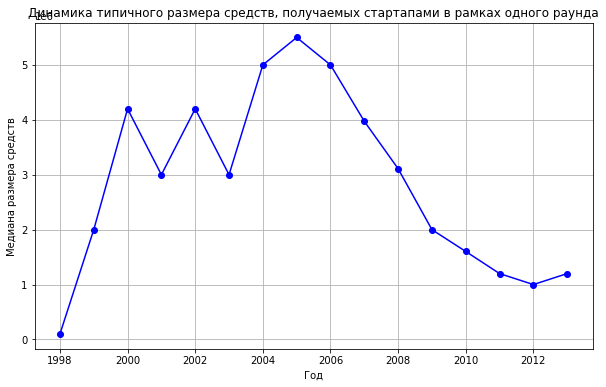

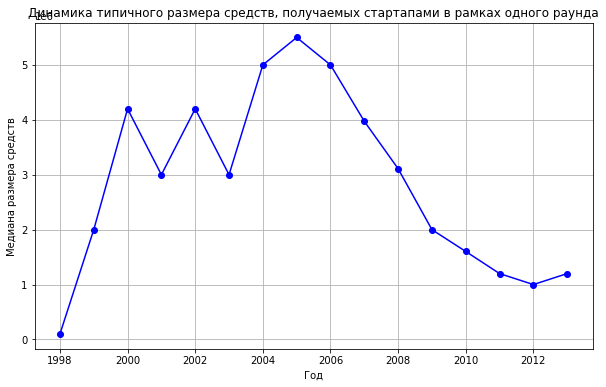

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_pivot_table.index, filtered_pivot_table['raised_amount'], marker='o', linestyle='-', color='b')
plt.title('Динамика типичного размера средств, получаемых стартапами в рамках одного раунда')
plt.xlabel('Год')
plt.ylabel('Медиана размера средств')
plt.grid(True)
plt.show()

Максимальный размер средств был собран в 2005 году и достиг 5 500 000.
К 2013 году тенденция по количеству раундов стала более стабильной, чем раньше, хоть и в 2012 количество было немного больше. В 2011 году - 23 503 раунда, 2012 году - 24 549 раунда, а в 2013 - 23 978 раунда, из чего следует что динамика стабильная и положительная. А что касается выделяемых средств, то данная ситуация координально противоположная по сравнению с динамикой по количеству раундов. С 2005 года размер выделяемых средств на один раунд с каждым годом уменьшается. Итого в 2005 году он составлял 5 500 000, а в 2013 году 1 200 000, что в 4,5 раза меньше. 


### 2.2. Люди и их образование


In [34]:
# группируем датасеты `people.csv` и `education.csv` в единый датафрейм
people_education = people.merge(education, left_on = 'id', right_on = 'person_id', how = 'left')
people_education

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,2415.00,10.00,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,0,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,0,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200,network,25958.00,174088.00,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419,itechsocialnet,18871.00,118386.00,ESCS,2004-01-01
267692,175827,mahesh,kumar,0,socialnethubs,NaN,NaN,NaN,NaT


,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,2415.00,10.00,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,0,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,0,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200,network,25958.00,174088.00,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419,itechsocialnet,18871.00,118386.00,ESCS,2004-01-01
267692,175827,mahesh,kumar,0,socialnethubs,NaN,NaN,NaN,NaT


In [35]:
# добавляем столбец с информацией о наличии образовании сотрудника 
people_education['no_education'] = people_education['instituition'].isna()

In [36]:
# считаем количество сотрудников в каждой компании
people_count_c = people_education.groupby('company_id')['id_x'].nunique().reset_index(name='people_count')

In [37]:
# присоединяем полученное значение количества сотрудников в каждой компании к датафрейму
final_people_education = people_education.merge(people_count_c, on = 'company_id')
final_people_education

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,no_education,people_count
0,10,Mark,Zuckerberg,5,NaN,2415.00,10.00,Harvard University,NaT,False,61
1,10430,Ruchi,Sanghvi,5,rsanghvi,4247.00,10430.00,Carnegie Mellon University,NaT,False,61
2,10430,Ruchi,Sanghvi,5,rsanghvi,4248.00,10430.00,Carnegie Mellon University,NaT,False,61
3,106199,Adam,Marchick,5,adammarstanford,15666.00,106199.00,Stanford University,2002-01-01,False,61
4,108814,Jimmy,Zhu,5,jyzhu,16050.00,108814.00,Massachusetts Institute of Technology (MIT),NaT,False,61
...,...,...,...,...,...,...,...,...,...,...,...
267689,99997,Peter,Lalonde,83651,peterlalonde,69682.00,99997.00,University of Ottawa,1993-01-01,False,1
267690,99997,Peter,Lalonde,83651,peterlalonde,69683.00,99997.00,Concordia University,1991-01-01,False,1
267691,99997,Peter,Lalonde,83651,peterlalonde,69684.00,99997.00,John Abbott College,1989-01-01,False,1
267692,174088,Dr. Ray,Woods,188200,network,25958.00,174088.00,Sydney University Medical School,1982-01-01,False,1


,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,no_education,people_count
0,10,Mark,Zuckerberg,5,NaN,2415.00,10.00,Harvard University,NaT,False,61
1,10430,Ruchi,Sanghvi,5,rsanghvi,4247.00,10430.00,Carnegie Mellon University,NaT,False,61
2,10430,Ruchi,Sanghvi,5,rsanghvi,4248.00,10430.00,Carnegie Mellon University,NaT,False,61
3,106199,Adam,Marchick,5,adammarstanford,15666.00,106199.00,Stanford University,2002-01-01,False,61
4,108814,Jimmy,Zhu,5,jyzhu,16050.00,108814.00,Massachusetts Institute of Technology (MIT),NaT,False,61
...,...,...,...,...,...,...,...,...,...,...,...
267689,99997,Peter,Lalonde,83651,peterlalonde,69682.00,99997.00,University of Ottawa,1993-01-01,False,1
267690,99997,Peter,Lalonde,83651,peterlalonde,69683.00,99997.00,Concordia University,1991-01-01,False,1
267691,99997,Peter,Lalonde,83651,peterlalonde,69684.00,99997.00,John Abbott College,1989-01-01,False,1
267692,174088,Dr. Ray,Woods,188200,network,25958.00,174088.00,Sydney University Medical School,1982-01-01,False,1


In [39]:
# определяем границы групп по численности сотрудников в компаниях
final_people_education['people_count_group'] = pd.cut(final_people_education['people_count'], 
                                                      bins=[0, 2, 10, 25, 75, 150, 10000], 
                                                      labels=['Компания из одного человека', 'Компания до 10 человек', 'Мини-компания', 'Малая компания', 'Средняя компания', 'Крупная компания'])
final_people_education['people_count_group']

0                      Малая компания
1                      Малая компания
2                      Малая компания
3                      Малая компания
4                      Малая компания
                     ...             
267689    Компания из одного человека
267690    Компания из одного человека
267691    Компания из одного человека
267692    Компания из одного человека
267693    Компания из одного человека
Name: people_count_group, Length: 267694, dtype: category
Categories (6, object): ['Компания из одного человека' < 'Компания до 10 человек' < 'Мини-компания' < 'Малая компания' < 'Средняя компания' < 'Крупная компания']

0                      Малая компания
1                      Малая компания
2                      Малая компания
3                      Малая компания
4                      Малая компания
                     ...             
267689    Компания из одного человека
267690    Компания из одного человека
267691    Компания из одного человека
267692    Компания из одного человека
267693    Компания из одного человека
Name: people_count_group, Length: 267694, dtype: category
Categories (6, object): ['Компания из одного человека' < 'Компания до 10 человек' < 'Мини-компания' < 'Малая компания' < 'Средняя компания' < 'Крупная компания']

In [40]:
#считаем среднюю долю сотрудников без информации об образовании 
no_educ_group= final_people_education.groupby('people_count_group')['no_education'].mean().rename({'no_education' : 'avg_no_education'})
round(no_educ_group, 2)

people_count_group
Компания из одного человека   0.36
Компания до 10 человек        0.39
Мини-компания                 0.33
Малая компания                0.18
Средняя компания              0.19
Крупная компания              0.20
Name: no_education, dtype: float64

people_count_group
Компания из одного человека   0.36
Компания до 10 человек        0.39
Мини-компания                 0.33
Малая компания                0.18
Средняя компания              0.19
Крупная компания              0.20
Name: no_education, dtype: float64

Выбрали именно такие границы для определения границ групп, чтобы обеспечить равномерное распределение компаний по группам. Вследствии чего такие границы позволяет корректно сравнивать компании разного размера и полноту информации об образовании сотрудников.

Присоединение таблицы degrees возможно, так как имеет связь с таблицами people и education через идентификатор сотрудника. При этом данная таблица может быть полезна так как имеет информацию о типе образования и специальности. При этом, выполняя данное задание, такие данные нам могут и не понадобиться - чтобы не распыляться на множество другой информации. Вывод: Таблицу degrees присоединить можно, но для выполнения данного задания этого не требуется.

Результаты анализа показывают, что полнота сведений об образовании сотрудников действительно зависит от размера компании. В частности, чем крупнее компания, тем меньшая доля сотрудников имеет пробелы в информации об образовании. 

### 2.3. Объединять или не объединять — вот в чём вопрос


Столбец network_username встречается в company_and_rounds, people и fund. 

In [42]:
# находим уникальные значения 
list_1 = company_and_rounds['network_username'].unique()
list_2 = people['network_username'].unique()
list_3 = fund['network_username'].unique()

In [43]:
# создаем цикл для нахождения общих значений между тремя списками
count = 0 
for i in list_1:
    if i in list_2 or i in list_3:
        count += 1
print(f"Количество общих значений 'network_username' между тремя списками: {count}")

Количество общих значений 'network_username' между тремя списками: 2262
Количество общих значений 'network_username' между тремя списками: 2262


95 534 строк с данными в датафрейме company_and_rounds, 38 867 строк с данными в people, 2 149 строк с данными в fund

In [44]:
# считаем количество уникальных значений 
unique_count_1 = company_and_rounds['network_username'].nunique()
unique_count_2 = people['network_username'].nunique()
unique_count_3 = fund['network_username'].nunique()
unique_count_1, unique_count_2, unique_count_3

(79571, 38421, 2098)

(79571, 38421, 2098)

- количество уникальных значений между датасетами значительно разнится, что может говорить о том, что данные в столбце 'network_username' несогласованы между датасетами
- количество общих значений свидетельствует о том, что пересечение данных между датасетами существует, но оно незначительное, по сравнению с тем, сколько данных хранится в трех датасетах 
- следует вывод, что использовать столбцы с именем 'network_username' для объединения данных между столбцами нельзя


### 2.4. Проблемный датасет и причина возникновения пропусков


In [45]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [46]:
# находим долю пропущенных значений 
company_and_rounds.isna().sum()/company_and_rounds.shape[0] * 100

company_ID             0.14
name                   0.14
category_code         33.93
status                 0.14
founded_at            49.51
closed_at             98.42
domain                32.43
network_username      56.13
country_code          50.13
investment_rounds      0.14
funding_rounds         0.14
funding_total          0.14
milestones             0.14
funding_round_id      75.70
company_id            75.70
funded_at             75.81
funding_round_type    75.70
raised_amount         75.70
pre_money_valuation   75.70
participants          75.70
is_first_round        75.70
is_last_round         75.70
year_funded           75.81
dtype: float64

company_ID             0.14
name                   0.14
category_code         33.93
status                 0.14
founded_at            49.51
closed_at             98.42
domain                32.43
network_username      56.13
country_code          50.13
investment_rounds      0.14
funding_rounds         0.14
funding_total          0.14
milestones             0.14
funding_round_id      75.70
company_id            75.70
funded_at             75.81
funding_round_type    75.70
raised_amount         75.70
pre_money_valuation   75.70
participants          75.70
is_first_round        75.70
is_last_round         75.70
year_funded           75.81
dtype: float64

In [47]:
# удаляем строки с пропущенными значениями в столбце company_ID
company_and_rounds.dropna(subset = ['company_ID'], inplace = True)
company_and_rounds['company_ID'].isna().sum()

0

0

In [48]:
company_and_rounds['company_ID'] = company_and_rounds['company_ID'].astype('int64')

In [49]:
# группируем данные по компаниям и агрегируем данные по каждому параметру 
group = company_and_rounds.groupby('company_ID').agg({'name' : 'first',
                                                      'category_code' : 'first',
                                                      'status' : 'first',
                                                      'founded_at' : 'first',
                                                      'closed_at' : 'first',
                                                      'domain' : 'first',
                                                      'network_username' : 'first',
                                                      'country_code' : 'first',
                                                      'investment_rounds' : 'first',
                                                      'funding_rounds' : 'first',
                                                      'funding_total' : 'first',
                                                      'milestones' : 'first',
                                                      'funded_at' : ['first', 'last'],
                                                      'raised_amount' : 'sum',
                                                      'pre_money_valuation' : 'first',
                                                      'participants' : 'mean',
                                                      'is_first_round' : ['first', 'last'],
                                                      'year_funded' : ['first', 'last']
        
})

In [50]:
# переименовываем столбцы 
group.columns = ['name',
                 'category_code',
                 'status',
                 'founded_at',
                 'closed_at',
                 'domain',
                 'network_username',
                 'country_code',
                 'investment_rounds',
                 'funding_rounds',
                 'funding_total',
                 'milestones',
                 'funded_at_first',
                 'funded_at_last',
                 'raised_amount',
                 'pre_money_valuation',
                 'participants',
                 'is_first_round_first',
                 'is_first_round_last',
                 'year_funded_first',
                 'year_funded_last'
]
group= group.reset_index()
group

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funded_at_first,funded_at_last,raised_amount,pre_money_valuation,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,2005-10-01,2008-05-19,39750000.00,0.00,3.00,0.00,1.00,2005.00,2008.00
1,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.00,...,0.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.00,...,5.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.00,...,8.00,2006-12-01,2011-07-12,45000000.00,0.00,3.50,0.00,1.00,2006.00,2011.00
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.00,...,5.00,2004-09-01,2011-01-21,2425700000.00,0.00,1.82,0.00,1.00,2004.00,2011.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,286210,LG Electronics North America,None,operating,NaT,NaT,None,None,None,0.00,...,1.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196549,286211,M1 Capital Advisors LLC,None,operating,NaT,NaT,None,None,None,0.00,...,0.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196550,286212,M1 Partners,None,operating,NaT,NaT,None,None,None,0.00,...,0.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196551,286213,Computer Solutions,None,operating,NaT,NaT,None,None,None,0.00,...,0.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funded_at_first,funded_at_last,raised_amount,pre_money_valuation,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,2005-10-01,2008-05-19,39750000.00,0.00,3.00,0.00,1.00,2005.00,2008.00
1,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.00,...,0.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.00,...,5.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.00,...,8.00,2006-12-01,2011-07-12,45000000.00,0.00,3.50,0.00,1.00,2006.00,2011.00
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.00,...,5.00,2004-09-01,2011-01-21,2425700000.00,0.00,1.82,0.00,1.00,2004.00,2011.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,286210,LG Electronics North America,None,operating,NaT,NaT,None,None,None,0.00,...,1.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196549,286211,M1 Capital Advisors LLC,None,operating,NaT,NaT,None,None,None,0.00,...,0.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196550,286212,M1 Partners,None,operating,NaT,NaT,None,None,None,0.00,...,0.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196551,286213,Computer Solutions,None,operating,NaT,NaT,None,None,None,0.00,...,0.00,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# меняем типы данных
group['investment_rounds'] = group['investment_rounds'].astype('int64')
group['funding_rounds'] = group['funding_rounds'].astype('int64')
group['milestones'] = group['milestones'].astype('int64')
group

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funded_at_first,funded_at_last,raised_amount,pre_money_valuation,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,2005-10-01,2008-05-19,39750000.00,0.00,3.00,0.00,1.00,2005.00,2008.00
1,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0,...,5,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,...,8,2006-12-01,2011-07-12,45000000.00,0.00,3.50,0.00,1.00,2006.00,2011.00
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,...,5,2004-09-01,2011-01-21,2425700000.00,0.00,1.82,0.00,1.00,2004.00,2011.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,286210,LG Electronics North America,None,operating,NaT,NaT,None,None,None,0,...,1,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196549,286211,M1 Capital Advisors LLC,None,operating,NaT,NaT,None,None,None,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196550,286212,M1 Partners,None,operating,NaT,NaT,None,None,None,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196551,286213,Computer Solutions,None,operating,NaT,NaT,None,None,None,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funded_at_first,funded_at_last,raised_amount,pre_money_valuation,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,2005-10-01,2008-05-19,39750000.00,0.00,3.00,0.00,1.00,2005.00,2008.00
1,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0,...,5,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,...,8,2006-12-01,2011-07-12,45000000.00,0.00,3.50,0.00,1.00,2006.00,2011.00
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,...,5,2004-09-01,2011-01-21,2425700000.00,0.00,1.82,0.00,1.00,2004.00,2011.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,286210,LG Electronics North America,None,operating,NaT,NaT,None,None,None,0,...,1,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196549,286211,M1 Capital Advisors LLC,None,operating,NaT,NaT,None,None,None,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196550,286212,M1 Partners,None,operating,NaT,NaT,None,None,None,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
196551,286213,Computer Solutions,None,operating,NaT,NaT,None,None,None,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN



## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных


In [52]:
# фильтруем датасет 
filtered_group = group.query("(funding_rounds > 0 or investment_rounds > 0) or status == 'acquired'")
filtered_group

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funded_at_first,funded_at_last,raised_amount,pre_money_valuation,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,2005-10-01,2008-05-19,39750000.00,0.00,3.00,0.00,1.00,2005.00,2008.00
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,...,8,2006-12-01,2011-07-12,45000000.00,0.00,3.50,0.00,1.00,2006.00,2011.00
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,...,5,2004-09-01,2011-01-21,2425700000.00,0.00,1.82,0.00,1.00,2004.00,2011.00
5,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,...,4,2006-12-01,2006-12-01,800000.00,0.00,4.00,1.00,1.00,2006.00,2006.00
6,8,Postini,web,acquired,1999-06-02,NaT,postini.com,None,USA,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196527,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0,...,0,2013-12-12,2013-12-12,225000.00,0.00,3.00,1.00,1.00,2013.00,2013.00
196528,286184,Seldar Pharma,biotech,operating,NaT,NaT,None,None,USA,0,...,0,2013-12-11,2013-12-11,12999000.00,0.00,0.00,1.00,1.00,2013.00,2013.00
196529,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,None,USA,0,...,0,2010-04-07,2010-04-07,2156060.00,0.00,0.00,1.00,1.00,2010.00,2010.00
196538,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,None,USA,0,...,0,2010-02-05,2010-02-05,1588120.00,0.00,0.00,1.00,1.00,2010.00,2010.00


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funded_at_first,funded_at_last,raised_amount,pre_money_valuation,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,2005-10-01,2008-05-19,39750000.00,0.00,3.00,0.00,1.00,2005.00,2008.00
3,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,...,8,2006-12-01,2011-07-12,45000000.00,0.00,3.50,0.00,1.00,2006.00,2011.00
4,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,...,5,2004-09-01,2011-01-21,2425700000.00,0.00,1.82,0.00,1.00,2004.00,2011.00
5,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,...,4,2006-12-01,2006-12-01,800000.00,0.00,4.00,1.00,1.00,2006.00,2006.00
6,8,Postini,web,acquired,1999-06-02,NaT,postini.com,None,USA,0,...,0,NaT,NaT,0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196527,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0,...,0,2013-12-12,2013-12-12,225000.00,0.00,3.00,1.00,1.00,2013.00,2013.00
196528,286184,Seldar Pharma,biotech,operating,NaT,NaT,None,None,USA,0,...,0,2013-12-11,2013-12-11,12999000.00,0.00,0.00,1.00,1.00,2013.00,2013.00
196529,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,None,USA,0,...,0,2010-04-07,2010-04-07,2156060.00,0.00,0.00,1.00,1.00,2010.00,2010.00
196538,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,None,USA,0,...,0,2010-02-05,2010-02-05,1588120.00,0.00,0.00,1.00,1.00,2010.00,2010.00



### 3.2. Анализ выбросов


In [53]:
# изучаем статистические показатели столбца funding_total
filtered_group['funding_total'].describe()

count        40747.00
mean      10135609.64
std       56464359.98
min              0.00
25%              0.00
50%         600000.00
75%        5650650.00
max     5700000000.00
Name: funding_total, dtype: float64

count        40747.00
mean      10135609.64
std       56464359.98
min              0.00
25%              0.00
50%         600000.00
75%        5650650.00
max     5700000000.00
Name: funding_total, dtype: float64

Большая разница между медианой и средним значением говорит о выбросах в данных. Минимальное значение равняется 0. Можно преположить, что такое происходит из-за того, что финансирование полностью отсутсвует и компания осуществляет свою деятельность с помощью амортизационных средств. Также это может быть по ряду других причин, например, выигрыш какого-либо тендера. Максимальное значение в виде 5 700 000 000 выглядит подозрительно, но такое значение может быть. 

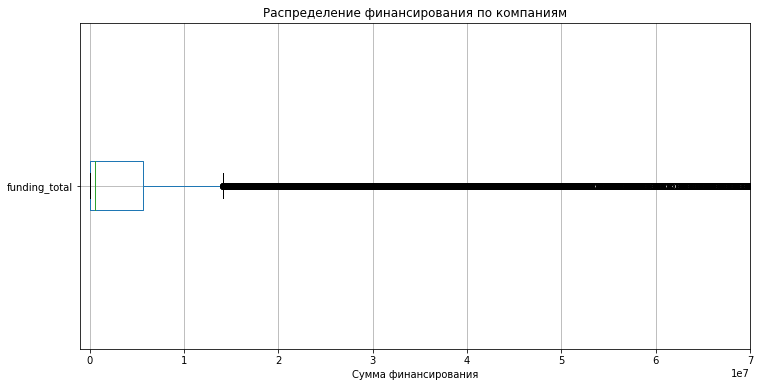

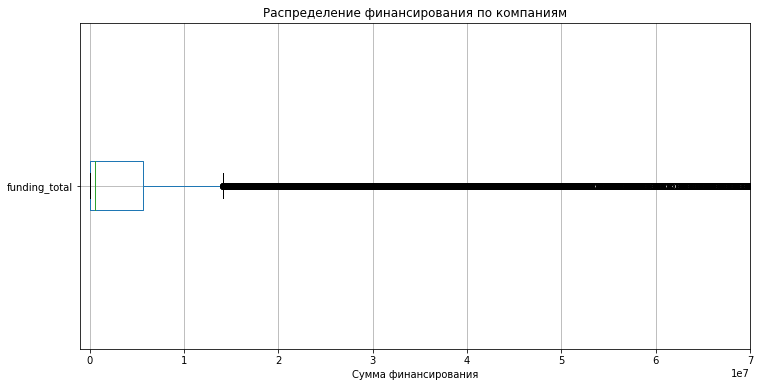

In [54]:
# Строим диаграмму размаxа для столбца funding_total
plt.figure(figsize=(12, 6))
filtered_group.boxplot(column = 'funding_total', vert = False)
plt.title('Распределение финансирования по компаниям')
plt.xlabel('Сумма финансирования')
plt.xlim(-1000000,70000000)
plt.show()

По "ящику с усами" можно считать значения, которые выше примерно 43 миллионов - выбросами. Исходя из диаграммы размаха, максимальные значения можно считать за выбросы, однако такое количество можно допустить для крупных компаний, которые специализируются на больших проектах, требующих бОльшего вложения. Именно по данной причине можно оставить данные, так как исключив их, можем потерять категории компаний, направленные на крупные проекты. 


### 3.3. Куплены забесплатно?

In [56]:
# Переименовываем column_ID в filtered_group для удобства
filtered_group.rename(columns={'company_ID': 'acquired_company_id'}, inplace=True)

# Соединяем две таблицы по общему ключу acquired_company_id
merged_data = pd.merge(filtered_group, acquisition, on='acquired_company_id', how='left')
merged_data

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,acquired_company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last,id,acquiring_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,3.00,0.00,1.00,2005.00,2008.00,NaN,NaN,NaN,NaN,NaT
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,...,3.50,0.00,1.00,2006.00,2011.00,7386.00,20953.00,NaN,500000.00,2012-07-12
2,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,...,1.82,0.00,1.00,2004.00,2011.00,NaN,NaN,NaN,NaN,NaT
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,...,4.00,1.00,1.00,2006.00,2006.00,NaN,NaN,NaN,NaN,NaT
4,8,Postini,web,acquired,1999-06-02,NaT,postini.com,None,USA,0,...,NaN,NaN,NaN,NaN,NaN,419.00,59.00,cash,625000000.00,2007-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0,...,3.00,1.00,1.00,2013.00,2013.00,NaN,NaN,NaN,NaN,NaT
40886,286184,Seldar Pharma,biotech,operating,NaT,NaT,None,None,USA,0,...,0.00,1.00,1.00,2013.00,2013.00,NaN,NaN,NaN,NaN,NaT
40887,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,None,USA,0,...,0.00,1.00,1.00,2010.00,2010.00,NaN,NaN,NaN,NaN,NaT
40888,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,None,USA,0,...,0.00,1.00,1.00,2010.00,2010.00,NaN,NaN,NaN,NaN,NaT


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,acquired_company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last,id,acquiring_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,3.00,0.00,1.00,2005.00,2008.00,NaN,NaN,NaN,NaN,NaT
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0,...,3.50,0.00,1.00,2006.00,2011.00,7386.00,20953.00,NaN,500000.00,2012-07-12
2,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,...,1.82,0.00,1.00,2004.00,2011.00,NaN,NaN,NaN,NaN,NaT
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0,...,4.00,1.00,1.00,2006.00,2006.00,NaN,NaN,NaN,NaN,NaT
4,8,Postini,web,acquired,1999-06-02,NaT,postini.com,None,USA,0,...,NaN,NaN,NaN,NaN,NaN,419.00,59.00,cash,625000000.00,2007-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0,...,3.00,1.00,1.00,2013.00,2013.00,NaN,NaN,NaN,NaN,NaT
40886,286184,Seldar Pharma,biotech,operating,NaT,NaT,None,None,USA,0,...,0.00,1.00,1.00,2013.00,2013.00,NaN,NaN,NaN,NaN,NaT
40887,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,None,USA,0,...,0.00,1.00,1.00,2010.00,2010.00,NaN,NaN,NaN,NaN,NaT
40888,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,None,USA,0,...,0.00,1.00,1.00,2010.00,2010.00,NaN,NaN,NaN,NaN,NaT


In [57]:
# фильтруем компании, которые были проданы за один или ноль долларов
zero_one_dollar = merged_data.query("price_amount in [0, 1]")

In [58]:
# фильтруем компании, у которых ненулевой общий объем финансирования
filtered = zero_one_dollar.query("funding_total != 0")
filtered

,acquired_company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last,id,acquiring_company_id,term_code,price_amount,acquired_at
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0,...,1.33,0.00,1.00,2007.00,2009.00,7954.00,687.00,NaN,0.00,2012-11-28
9,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,...,4.25,0.00,0.00,2005.00,2001.00,4283.00,20.00,NaN,0.00,2007-05-30
11,14,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,None,USA,0,...,2.67,0.00,1.00,2007.00,2009.00,2692.00,37730.00,NaN,0.00,2009-12-15
19,23,Joost,games_video,acquired,2006-10-01,NaT,joost.com,None,USA,0,...,3.00,1.00,1.00,2007.00,2007.00,2622.00,3396.00,NaN,0.00,2009-11-24
32,38,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0,...,3.00,0.00,1.00,2007.00,2012.00,5075.00,475.00,NaN,0.00,2011-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37230,259939,Pluromed,hardware,acquired,2003-01-01,NaT,pluromed.com,None,USA,0,...,0.00,1.00,0.00,2012.00,2010.00,9527.00,28373.00,NaN,0.00,2012-03-16
37247,260008,Rhetorical Group plc,None,acquired,2002-01-01,NaT,None,None,None,0,...,1.00,1.00,1.00,2001.00,2001.00,9631.00,237526.00,NaN,0.00,2004-01-01
37413,261146,Endurance Lending Network,finance,acquired,2011-12-01,NaT,enduranceln.com,EnduranceLN,USA,0,...,5.00,1.00,1.00,2012.00,2012.00,10166.00,43210.00,stock,0.00,2013-10-25
38108,266567,WiiiWaaa,web,acquired,NaT,NaT,wiiiwaaa.com,wiiiwaaa,None,0,...,0.00,1.00,1.00,2012.00,2012.00,9066.00,236079.00,cash,0.00,2000-05-01


,acquired_company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,participants,is_first_round_first,is_first_round_last,year_funded_first,year_funded_last,id,acquiring_company_id,term_code,price_amount,acquired_at
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0,...,1.33,0.00,1.00,2007.00,2009.00,7954.00,687.00,NaN,0.00,2012-11-28
9,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0,...,4.25,0.00,0.00,2005.00,2001.00,4283.00,20.00,NaN,0.00,2007-05-30
11,14,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,None,USA,0,...,2.67,0.00,1.00,2007.00,2009.00,2692.00,37730.00,NaN,0.00,2009-12-15
19,23,Joost,games_video,acquired,2006-10-01,NaT,joost.com,None,USA,0,...,3.00,1.00,1.00,2007.00,2007.00,2622.00,3396.00,NaN,0.00,2009-11-24
32,38,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0,...,3.00,0.00,1.00,2007.00,2012.00,5075.00,475.00,NaN,0.00,2011-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37230,259939,Pluromed,hardware,acquired,2003-01-01,NaT,pluromed.com,None,USA,0,...,0.00,1.00,0.00,2012.00,2010.00,9527.00,28373.00,NaN,0.00,2012-03-16
37247,260008,Rhetorical Group plc,None,acquired,2002-01-01,NaT,None,None,None,0,...,1.00,1.00,1.00,2001.00,2001.00,9631.00,237526.00,NaN,0.00,2004-01-01
37413,261146,Endurance Lending Network,finance,acquired,2011-12-01,NaT,enduranceln.com,EnduranceLN,USA,0,...,5.00,1.00,1.00,2012.00,2012.00,10166.00,43210.00,stock,0.00,2013-10-25
38108,266567,WiiiWaaa,web,acquired,NaT,NaT,wiiiwaaa.com,wiiiwaaa,None,0,...,0.00,1.00,1.00,2012.00,2012.00,9066.00,236079.00,cash,0.00,2000-05-01


In [59]:
# находим долю отфильтрованных компаний от общего числа 
filtered['acquired_company_id'].nunique() / filtered_group['acquired_company_id'].nunique()

0.03909490269222274

0.03909490269222274

In [60]:
# группируем отфильтрованные данные по категориям области деятельности компании 
category_cat = filtered.groupby('category_code')['acquired_company_id'].nunique().sort_values(ascending=True)
category_cat.tail(5)

category_code
games_video     75
mobile         116
enterprise     128
web            208
software       360
Name: acquired_company_id, dtype: int64

category_code
games_video     75
mobile         116
enterprise     128
web            208
software       360
Name: acquired_company_id, dtype: int64

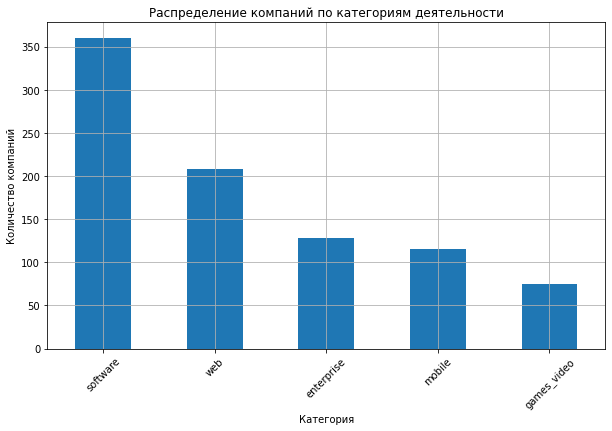

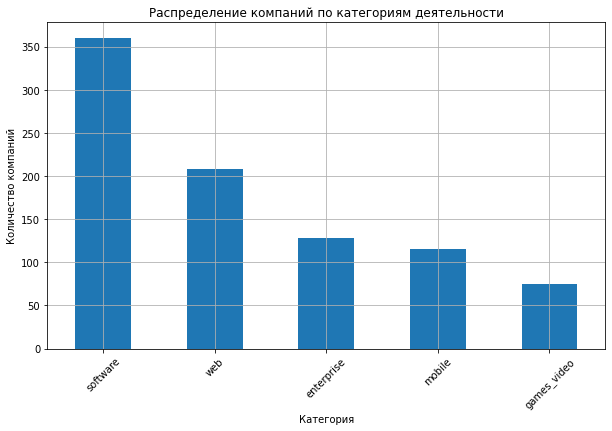

In [61]:
# строим график столбчатой диаграммы по категориям области деятельности компании 
category_cat.tail(5).sort_values(ascending = False).plot(kind = 'bar',
             title = 'Распределение компаний по категориям деятельности',
             legend = False,
             xlabel = 'Категория',
             ylabel = 'Количество компаний',
             rot = 45,
             figsize = (10, 6))
plt.grid()
plt.show()

Большинство компаний (более 350), которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования, находятся в категории software

In [62]:
# группируем отфильтрованные данные по странам 
country_cat = filtered.groupby('country_code')['acquired_company_id'].nunique().sort_values(ascending=True)
country_cat.tail(5)

country_code
ISR      27
DEU      31
CAN      46
GBR      64
USA    1215
Name: acquired_company_id, dtype: int64

country_code
ISR      27
DEU      31
CAN      46
GBR      64
USA    1215
Name: acquired_company_id, dtype: int64

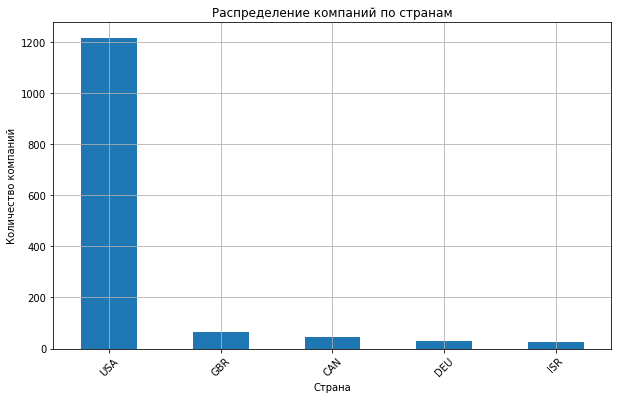

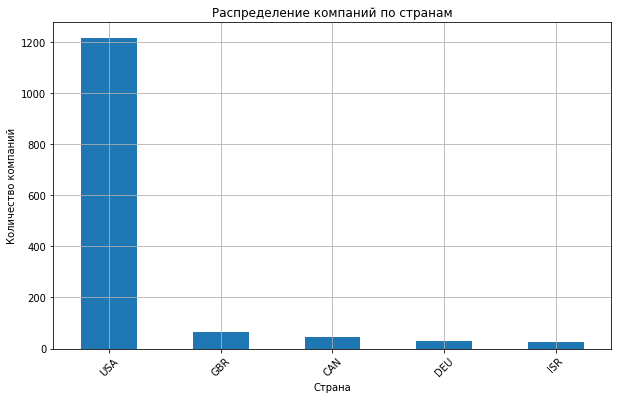

In [63]:
# строим график столбчатой диаграммы по категориям области деятельности компании 
country_cat.tail(5).sort_values(ascending = False).plot(kind = 'bar',
             title = 'Распределение компаний по странам',
             legend = False,
             xlabel = 'Страна',
             ylabel = 'Количество компаний',
             rot = 45,
             figsize = (10, 6))
plt.grid()
plt.show()

Большинство компаний (более 1200), которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования, находятся в USA. 

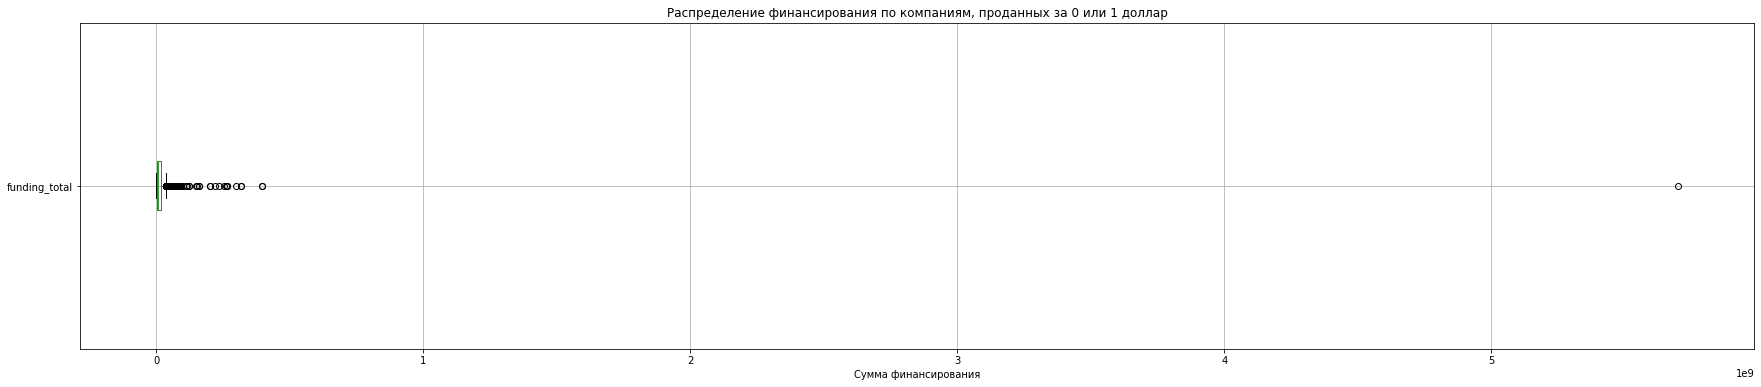

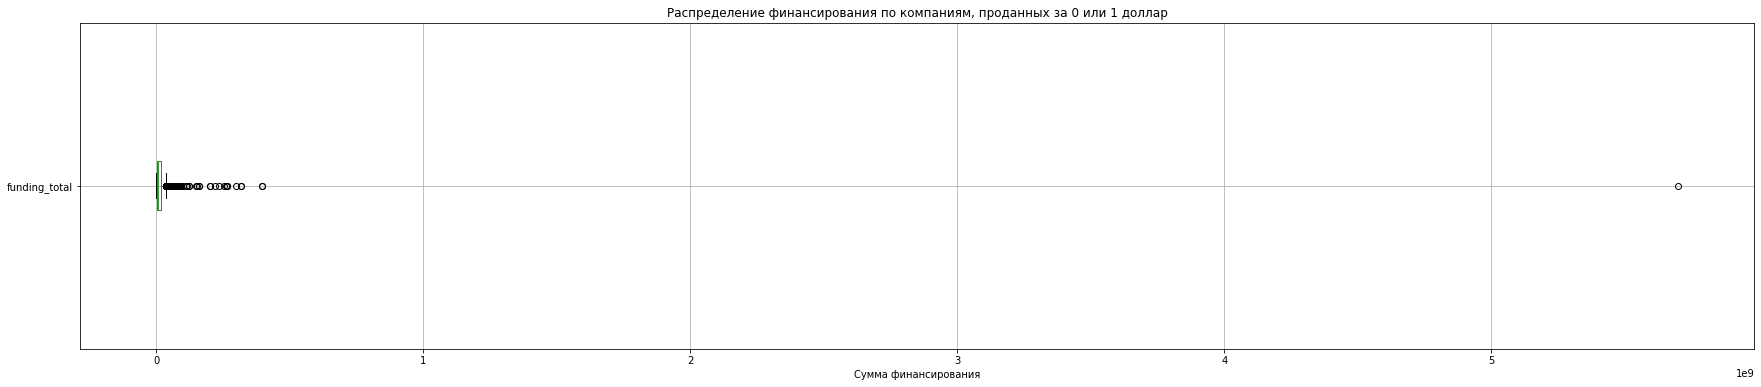

In [65]:
# строим диаграмму размаxа для столбца funding_total
plt.figure(figsize=(30, 6))
filtered.boxplot(column = 'funding_total', vert = False)
plt.title('Распределение финансирования по компаниям, проданных за 0 или 1 доллар')
plt.xlabel('Сумма финансирования')
plt.show()

По "ящику с усами" можно считать значения, которые выше примерно 0.1 * 10^9 - выбросами. Исходя из диаграммы размаха, максимальные значения можно считать за выбросы. По данному графику трудно обозначить конкретные значения, так как имеется большое аномальное значение в виде, примерно, 5.7 * 10 ^9. 

In [66]:
# рассчитываем аналитическую нижнюю и верхнюю границу выбросов для столбца funding_total
Q1 = filtered['funding_total'].quantile(0.25)
Q3 = filtered['funding_total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(Q1 - 1.5 * IQR, 0)
upper_bound = Q3 + 1.5 * IQR
upper_bound, lower_bound

(35750000.0, 0)

(35750000.0, 0)

In [67]:
# считаем сколько компаний осталось за пределами верхней и нижней границами выбросов 
top = filtered[(filtered['funding_total'] < lower_bound) | (filtered['funding_total'] > upper_bound)]
top['acquired_company_id'].nunique()

143

143

In [68]:
# находим долю от общего числа
top['acquired_company_id'].nunique() / filtered_group['acquired_company_id'].nunique()

0.0035094608192014136

0.0035094608192014136

Границы соответствуют 25 и 75 процентилю. 5 процентов от общего числа компаний считаются за пределами верхней и нижней границами выбросов - это значит, что такие компании находятся в "аномальной" зоне. 
Если заказчик отфильтрует данные по данным процентилям, то тогда он потеряет данные за 5% компаний. Верхнее значение (35 750 000) соответсвует 0.91 процентилю. 

In [70]:
# считаем процентиль верхней границы выбросов 
q = .90967
print(f"Процентилю {q:.2f} соответствует значение {filtered.funding_total.quantile(q):_.0f}")

Процентилю 0.91 соответствует значение 35_758_654
Процентилю 0.91 соответствует значение 35_758_654


In [71]:
(filtered['funding_total'] < upper_bound).mean()

0.9091470951792336

0.9091470951792336

In [72]:
filtered['funding_total'].quantile(0.90967)

35758653.500000045

35758653.500000045

In [73]:
top_perc = top['funding_total'].rank(pct = True)
top_perc

19      0.31
34      0.73
72      0.48
111     0.12
112     0.12
        ... 
23074   0.77
23168   0.39
27950   0.25
29027   0.74
32700   0.13
Name: funding_total, Length: 147, dtype: float64

19      0.31
34      0.73
72      0.48
111     0.12
112     0.12
        ... 
23074   0.77
23168   0.39
27950   0.25
29027   0.74
32700   0.13
Name: funding_total, Length: 147, dtype: float64


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [74]:
# группируем по категориям и производим расчет средних и стандартных отклонений 
grouped = merged_data.groupby('category_code').agg({'price_amount' : ['median', 'std']})
grouped.columns = ['median_price', 'std_price']
grouped

,median_price,std_price
category_code,,
advertising,0.00,279922643.51
analytics,0.00,52671642.49
automotive,43000000.00,2297757559.01
biotech,13200000.00,1540373521.41
cleantech,0.00,552287325.04
consulting,0.00,505481358.76
design,0.00,0.00
ecommerce,0.00,151236352.36
education,0.00,125364201.89


,median_price,std_price
category_code,,
advertising,0.00,279922643.51
analytics,0.00,52671642.49
automotive,43000000.00,2297757559.01
biotech,13200000.00,1540373521.41
cleantech,0.00,552287325.04
consulting,0.00,505481358.76
design,0.00,0.00
ecommerce,0.00,151236352.36
education,0.00,125364201.89


In [75]:
# сортируем и выводим первые 10 категорий
sorted_median = grouped.sort_values(by = 'median_price', ascending = False).head(10)
sorted_std = grouped.sort_values(by = 'std_price', ascending = False).head(10)
sorted_median, sorted_std 

(               median_price     std_price
 category_code                            
 nanotech       584000000.00           NaN
 manufacturing   72000000.00  969657968.02
 real_estate     50000000.00 2505122913.06
 automotive      43000000.00 2297757559.01
 biotech         13200000.00 1540373521.41
 hospitality     12500000.00  651449440.58
 finance           600000.00  796098475.78
 news                   0.00   70965628.09
 nonprofit              0.00           NaN
 other                  0.00 1085128941.40,
                   median_price       std_price
 category_code                                 
 enterprise                0.00 128088235060.17
 public_relations          0.00   4059244205.05
 real_estate        50000000.00   2505122913.06
 automotive         43000000.00   2297757559.01
 biotech            13200000.00   1540373521.41
 health                    0.00   1249084287.10
 other                     0.00   1085128941.40
 manufacturing      72000000.00    969657968.02
 fi

(               median_price     std_price
 category_code                            
 nanotech       584000000.00           NaN
 manufacturing   72000000.00  969657968.02
 real_estate     50000000.00 2505122913.06
 automotive      43000000.00 2297757559.01
 biotech         13200000.00 1540373521.41
 hospitality     12500000.00  651449440.58
 finance           600000.00  796098475.78
 news                   0.00   70965628.09
 nonprofit              0.00           NaN
 other                  0.00 1085128941.40,
                   median_price       std_price
 category_code                                 
 enterprise                0.00 128088235060.17
 public_relations          0.00   4059244205.05
 real_estate        50000000.00   2505122913.06
 automotive         43000000.00   2297757559.01
 biotech            13200000.00   1540373521.41
 health                    0.00   1249084287.10
 other                     0.00   1085128941.40
 manufacturing      72000000.00    969657968.02
 fi

In [76]:
# пересекаем списки
fin_list = set(sorted_median.index) & set(sorted_std.index)
fin_list

{'automotive', 'biotech', 'finance', 'manufacturing', 'other', 'real_estate'}

{'automotive', 'biotech', 'finance', 'manufacturing', 'other', 'real_estate'}

Вывели топ-10 из каждой категории, так как это отсеивает остальное большее количество значений, у которых величина приблеженна друг к другу. Соединяя данные списки, формируются те категории, которые были в обоих категориях одновременно, что позволяет выбрать лучшие из лучших. 


### 3.5. Сколько раундов продержится стартап перед покупкой

In [77]:
merged_data['funding_rounds'].describe()

count   40890.00
mean        1.29
std         1.26
min         0.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64

count   40890.00
mean        1.29
std         1.26
min         0.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64

Большая разница между медианой и средним значением говорит о выбросах в данных. Минимальное значение равняется 0.   Максимальное значение -12 раундов.

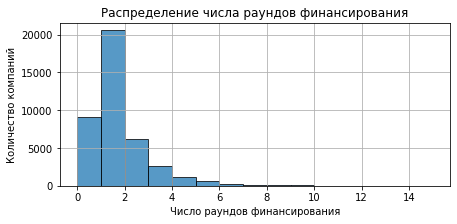

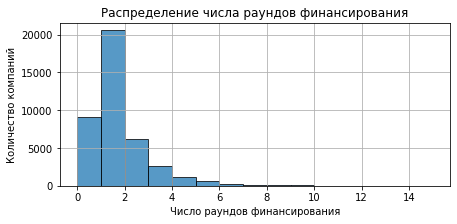

In [78]:
# строим гистограмму
plt.figure(figsize=(7, 3))
merged_data['funding_rounds'].plot(
                kind='hist', 
                bins=15,
                alpha=0.75,
                edgecolor='black',
                rot=0)
plt.title('Распределение числа раундов финансирования')
plt.xlabel('Число раундов финансирования')
plt.ylabel('Количество компаний')
plt.grid()
plt.show()

Распредление значения ассиметрично - скошено вправо. Минимальное количество раундов финансирования равно нулю, а максимальное - 12, что можно считать корректным. На графике можно увидеть, что больше всего в компаниях число раундов финансирования находится в диапазоне от 1 до 2. 

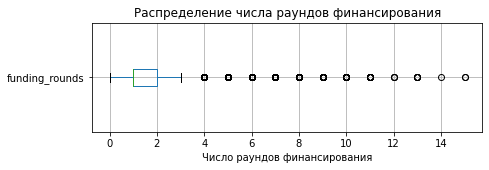

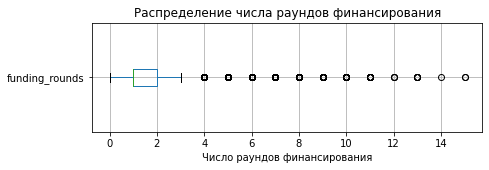

In [79]:
# Строим диаграмму размаxа для столбца funding_rounds
plt.figure(figsize=(7, 2))
merged_data.boxplot(column = 'funding_rounds', vert = False)
plt.title('Распределение числа раундов финансирования')
plt.xlabel('Число раундов финансирования')
plt.show()

По "ящику с усами" можно считать значения, которые выше примерно 3 - выбросами. Исходя из диаграммы размаха, максимальные значения можно считать за выбросы, однако такое количество можно допустить для компаний, которые специализируются на курпных проектах. Именно по данной причине можно оставить данные, так как исключив их, можем потерять данные. 

In [80]:
tipical_df = merged_data.query("(funding_rounds > 0)")

In [81]:
# находим типичное значение количества раундов для каждого возможного статуса стартапа
tipical = tipical_df.groupby('status')['funding_rounds'].mean()
tipical

status
acquired    1.90
closed      1.38
ipo         2.53
operating   1.64
Name: funding_rounds, dtype: float64

status
acquired    1.90
closed      1.38
ipo         2.53
operating   1.64
Name: funding_rounds, dtype: float64

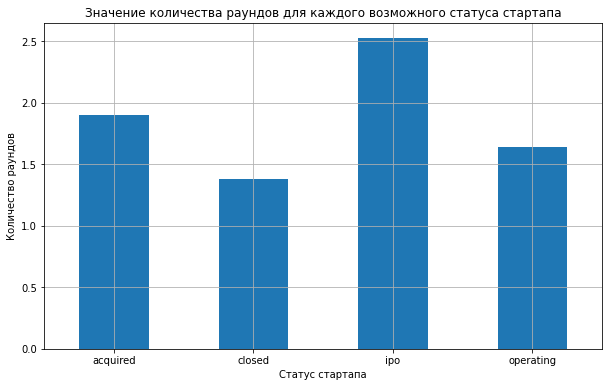

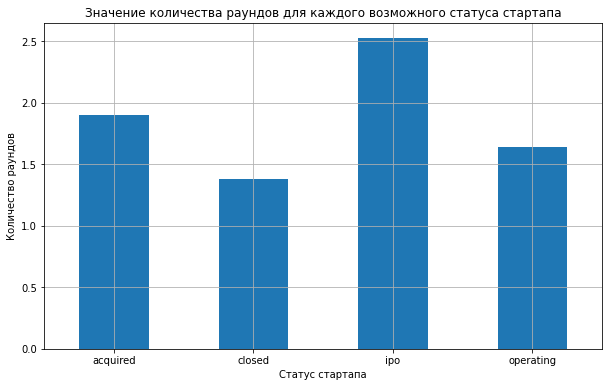

In [82]:
#строим столбчатую диаграмму 
tipical.plot(kind = 'bar',
               title = 'Значение количества раундов для каждого возможного статуса стартапа',
               legend = False,
               xlabel = 'Статус стартапа',
               ylabel = 'Количество раундов',
               rot = 0,
               figsize = (10, 6))
plt.grid()
plt.show()

На столбчатой диаграмме видно, что самое большое количество раундов у статуса "ipo" в количестве 2,53 штук, а самое маленькое у "closed" в количестве 1,38 штук. 

Большое или маленькое количество раундов финансирования может говорить о различных аспектах развития стартапа: от стадии жизненного цикла до финансовой устойчивости и потенциала роста. Чтобы сделать правильные выводы, важно учитывать контекст и специфику конкретно каждого случая.


## Шаг 4. Итоговый вывод и рекомендации


В ходе исследования проанализировали данные более 100 тысяч компаний из нескольких стран. Данные включали в себя информацию о компании, ее работников и их образовании. Акцент исследования был на том, чтобы привести данные в порядок и ответить на некоторые вопросы заказчика, касающиеся значений данных для бизнеса. 

### Общий обзор данных 

- максимальный размер средств был собран в 2005 году и достиг 5 500 000
- полнота сведений об образовании сотрудников зависит от размера компании. В частности, чем крупнее компания, тем меньшая доля сотрудников имеет пробелы в информации об образовании.
- в данных имеется большое количество пропущенных значений, при этом с ними можно работать, так как можно получить корректный исследовательский анализ

### Рекомендации 

Чтобы выйти на инвестиционный рынок, финансовая компания должна для себя решить и понять: каким компаниям (большим или маленьким) предоставлять льготные займы, оценить уровень риска на который они готовы пойти, изучить потребности и предпочтения выбранной целевой аудитории и предоставлять подходящие продукты или сервисы и так далее.

Ведь большие компании требуют намного большего вложения, при этом риск может быть точно таким же, как и для средних или даже маленьких компаний. У маленьких компаний, как правило, нет больших вложений, но риск также оправдано высок. 
Также рекомендуем обратить внимание на уровень образования сотрудников, так как привлечение выпускников престижных университетов или людей с редкими навыками может стать дополнительным фактором при выборе стартапа для поддержки. 
Вместе с тем, анализируя раунды финансирования, можно прогнозировать, когда стартапам понадобятся дополнительные ресурсы, и предлагать свои услуги в нужное время. 